In [259]:
#Import the neccessary libraries
#Libraries for Loading the dataset and EDA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Libraries for NLPP
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
#Libraries for modeling 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score



In [230]:
#Load the datatset
tweets = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
tweets.head(35)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [231]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [232]:
tweets.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [233]:
tweets.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [234]:
#drop missing data in tweet_text
tweets.dropna(subset =['tweet_text'], inplace = True)

In [235]:
tweets.head(25)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion


In [236]:
#handle the missing data
tweets['emotion_in_tweet_is_directed_at'].fillna('Unknown', inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_18760\2649023659.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tweets['emotion_in_tweet_is_directed_at'].fillna('Unknown', inplace = True)


In [237]:
#check if values are filled
tweets.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [238]:
#Check the groupings of the dataset for is_there_an_emotion_directed_at_a_brand_or_product
tweets.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [239]:
#reduce the options for is_there_an_emotion_directed_at_a_brand_or_product
tweets['is_there_an_emotion_directed_at_a_brand_or_product'] = tweets['is_there_an_emotion_directed_at_a_brand_or_product'].replace(["No emotion toward brand or product","I can't tell"], 'Neutral')
tweets.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
Neutral             5544
Positive emotion    2978
Negative emotion     570
Name: count, dtype: int64

In [240]:
#Verify they have been reduced
tweets.head(35)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,Unknown,Neutral
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion


In [241]:
#Let's look at the value_counts for the emotion_is_directed_at column
tweets.emotion_in_tweet_is_directed_at.value_counts()

emotion_in_tweet_is_directed_at
Unknown                            5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: count, dtype: int64

In [242]:
#Remove the columns where the emotion_in_tweet_is_directed_at is 'Unknown'
tweets = tweets[tweets['emotion_in_tweet_is_directed_at']!= 'Unknown']

In [243]:
#Verify the 'unknown'values have been removed
tweets.head(25)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion


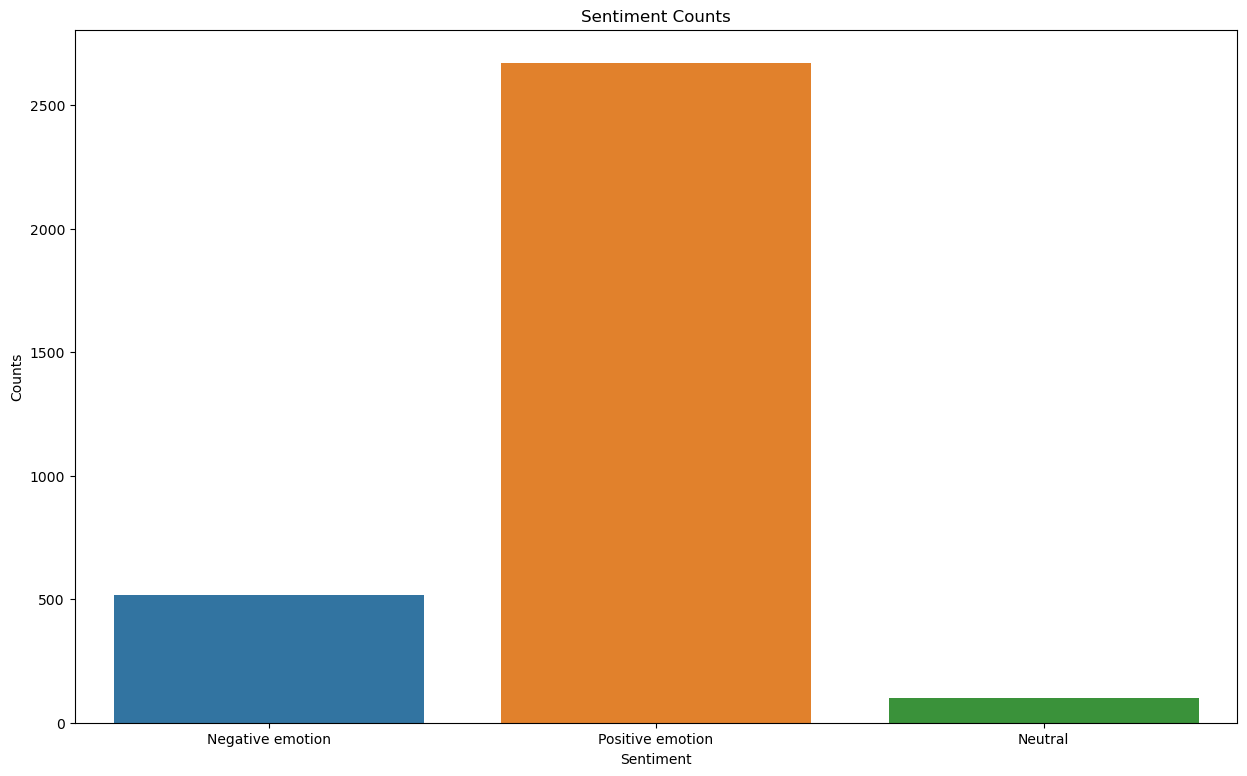

In [244]:
#plot the distribution of the count for is_there_an_emotion_directed_at_a_brand_or_product
plt.figure(figsize=(15,9))
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data = tweets)
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()


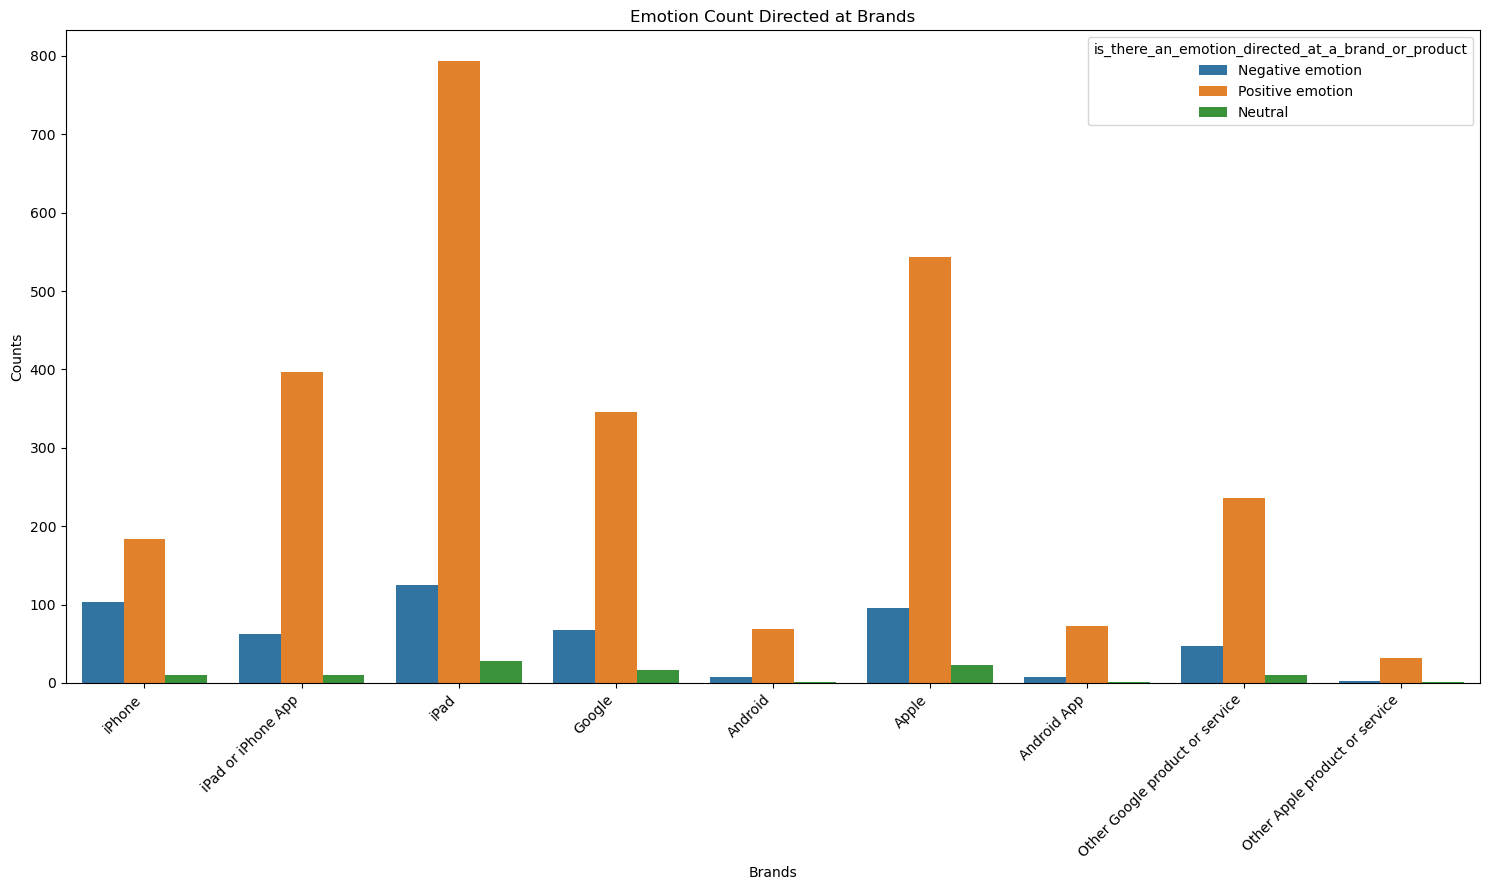

In [245]:
#plot the distribution of the count for is_there_an_emotion_directed_at_a_brand_or_product
plt.figure(figsize=(15,9))
sns.countplot(x='emotion_in_tweet_is_directed_at', hue = 'is_there_an_emotion_directed_at_a_brand_or_product',data = tweets)
plt.title('Emotion Count Directed at Brands')
plt.xlabel('Brands')
plt.ylabel('Counts')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()


In [246]:
#Preprocess the text
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet_text(text):
    text = text.lower()
    # Remove mentions, hashtags, and URLs
    text = re.sub(r'@\w+|#\w+|http\S+|www\S+|https\S+', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text using `tokenizer`
    tokens = tokenizer.tokenize(text)
     # Remove stopwords using `stopwords_list`
    clean_text = [word for word in tokens if word not in stop_words]
    #Perform stemming
    clean_text = [lemmatizer.lemmatize(word) for word in clean_text]  
    return clean_text 

In [247]:
#clean the tweet_text column
tweets['clean_tweet_text'] = tweets['tweet_text'].apply(lambda x: clean_tweet_text(x))

In [250]:
#View the new dataset
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,clean_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[iphone, hr, tweeting, dead, need, upgrade, pl..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipadiphone, app, youll, likely..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, year, festival, isnt, crashy, year, iph..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, marissa, mayer, google, ti..."


In [248]:
tweets.emotion_in_tweet_is_directed_at.value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

## MODELING


In [251]:
#create a simple dataframe to perform a binary classification with target only positive and negative
bc_tweets = tweets.copy()

In [253]:
bc_tweets.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
Positive emotion    2672
Negative emotion     519
Neutral              100
Name: count, dtype: int64

In [256]:
#Remove the columns where 'is_there_an_emotion_directed_at_a_brand_or_product'  is 'Neutral'
bc_tweets = bc_tweets[bc_tweets['is_there_an_emotion_directed_at_a_brand_or_product']!= 'Neutral']

In [257]:
#make the token lists into strings
bc_tweets['joined_clean_text'] = bc_tweets['clean_tweet_text'].str.join(' ')

In [258]:
bc_tweets.head(25)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,clean_tweet_text,joined_clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[iphone, hr, tweeting, dead, need, upgrade, pl...",iphone hr tweeting dead need upgrade plugin st...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipadiphone, app, youll, likely...",know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, also, sale]",wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, year, festival, isnt, crashy, year, iph...",hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, marissa, mayer, google, ti...",great stuff fri marissa mayer google tim oreil...
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,"[starting, around, corner, hop, skip, jump, go...",starting around corner hop skip jump good time...
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,"[beautifully, smart, simple, idea, wrote, ipad...",beautifully smart simple idea wrote ipad app
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,"[counting, day, plus, strong, canadian, dollar...",counting day plus strong canadian dollar mean ...
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,"[excited, meet, show, sprint, galaxy, still, r...",excited meet show sprint galaxy still running ...
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion,"[find, amp, start, impromptu, party, cant, wai...",find amp start impromptu party cant wait til a...


In [272]:
#create the train and test split

#define the target and the features
X = bc_tweets['joined_clean_text']
y = bc_tweets['is_there_an_emotion_directed_at_a_brand_or_product']

#perform Label encoding on the target
#Initialize the encoder
le = LabelEncoder()
#fit the encoder on the target
y_encoded = le.fit_transform(y)

tfidf = TfidfVectorizer()
X_vec = tfidf.fit_transform(X)

#create the train and test split
X_train, X_test, y_train, y_test = train_test_split(X_vec,y_encoded, test_size=0.2, random_state=42)

In [273]:
#Create a Logistic regression
logreg = LogisticRegression()
#Fit the regressor on the train set
logreg.fit(X_train, y_train)

LogisticRegression()

In [274]:
#Make prediction for the train and test
y_log_train_pred = logreg.predict(X_train)
y_log_test_pred = logreg.predict(X_test)



The outcome of the training classification report is:
              precision    recall  f1-score   support

           0       0.99      0.17      0.29       424
           1       0.86      1.00      0.92      2128

    accuracy                           0.86      2552
   macro avg       0.92      0.59      0.61      2552
weighted avg       0.88      0.86      0.82      2552




The outcome of the test classification report is:
              precision    recall  f1-score   support

           0       0.88      0.07      0.14        95
           1       0.86      1.00      0.92       544

    accuracy                           0.86       639
   macro avg       0.87      0.54      0.53       639
weighted avg       0.86      0.86      0.81       639




The confusion matric for the train set is:
[[  73  351]
 [   1 2127]]



The confusion matric for the test set is:
[[  7  88]
 [  1 543]]



The accuracy score for the train set is: 0.8620689655172413
The accuracy score for the test set

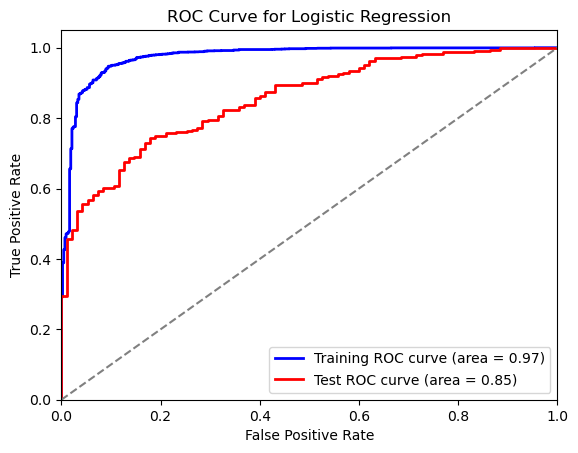

In [275]:
#Model Evaluation
#Creating a classification report 
train_class_report = classification_report(y_train, y_log_train_pred)
test_class_report = classification_report(y_test, y_log_test_pred)
#Display the results of the classification report
print('The outcome of the training classification report is:')
print(train_class_report)
print('\n\n')
print('The outcome of the test classification report is:')
print(test_class_report)
print('\n\n')

#Let's create a confusion matrix that can helpprovide a summary of prediction results
train_conf_mat = confusion_matrix(y_train, y_log_train_pred)
test_conf_mat = confusion_matrix(y_test, y_log_test_pred)
#Display the confusion matrix results for the train and test sets
print('The confusion matric for the train set is:')
print(train_conf_mat)
print('\n\n')
print('The confusion matric for the test set is:')
print(test_conf_mat)
print('\n\n')

#Now let's look at the accuracy score for both sets 
train_acc = accuracy_score(y_train, y_log_train_pred)
test_acc = accuracy_score(y_test, y_log_test_pred)
#Display the results of the accuracy score
print('The accuracy score for the train set is:', train_acc)
print('The accuracy score for the test set is:', test_acc)

#Fianlly we should consider the ROC curve and the AUC
#start by getting probability estimates of the positive class
y_train_prob = logreg.predict_proba(X_train)[:, 1]
y_test_prob = logreg.predict_proba(X_test)[:, 1]
#ROC curve for the training data
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)
#ROC curve for the test set
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)
#plot the ROC curve
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [276]:
#address the class imbalance
#Import neccessary library
from imblearn.over_sampling import SMOTE
#initialize the 
smote = SMOTE(random_state=42)
#Ffit on the train sets
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

In [279]:
#train the model
logreg.fit(smote_X_train, smote_y_train)

LogisticRegression()

In [282]:
#make prediction on for the train and test sets
smote_log_train_pred = logreg.predict(smote_X_train)
smote_test_log_pred = logreg.predict(X_test)

In [286]:
# Evaluate the model
#Look at the classification report
print('The classification report for the training set is:')
print(classification_report(smote_y_train, smote_log_train_pred))
print('\n')
print('The classification report for the test set is:')
print(classification_report(y_test, smote_test_log_pred))
print('\n\n')
#Show accuracy for both sets
print('the accuracy for the training set is:',accuracy_score(smote_y_train, smote_log_train_pred))
print('th eaccuracy for the test set is:', accuracy_score(y_test, smote_test_log_pred))
print('\n')


#Create the ROC curve and AUC for both sets
#start by getting the probability for each od the sets
#clf_train_prob = clf.predict_proba(X_train)[:, 1] 
#clf_test_prob = clf.predict_proba(X_test)[:, 1] 
#calculate the ROC and auc 
#train_fpr, train_tpr, train_threshold = roc_curve(y_train, clf_train_prob)
#train_auc = auc(train_fpr, train_tpr)
#test_fpr, test_tpr, test_threshold = roc_curve(y_test, clf_test_prob)
#test_auc = auc(test_fpr, test_tpr)
#plot the ROC roc_curve
#plt.figure()
#plt.plot(train_fpr, train_tpr, color='blue', label=f'Train AUC = {train_auc:.2f}')
#plt.plot(test_fpr, test_tpr, color='red', linestyle='--', label=f'Test AUC = {test_auc:.2f}')
#plt.plot([0, 1], [0, 1], color='grey', linestyle=':')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
#plt.legend(loc='lower right')
#plt.show()


The classification report for the training set is:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2128
           1       0.97      0.96      0.97      2128

    accuracy                           0.97      4256
   macro avg       0.97      0.97      0.97      4256
weighted avg       0.97      0.97      0.97      4256



The classification report for the test set is:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        95
           1       0.92      0.91      0.91       544

    accuracy                           0.85       639
   macro avg       0.71      0.72      0.72       639
weighted avg       0.86      0.85      0.86       639




the accuracy for the training set is: 0.9661654135338346
th eaccuracy for the test set is: 0.8544600938967136




## DECISION TREE CLASSIFIER

In [287]:
#Initialize the classifier

dct = DecisionTreeClassifier()

#fit the model
dct. fit(smote_X_train, smote_y_train)

#make predictions
smote_tree_train_pred = dct.predict(smote_X_train)
smote_tree_test_pred = dct.predict(X_test)

In [288]:
print("Classification Report for Training Set:")
print(classification_report(smote_y_train, smote_tree_train_pred))
print("Classification Report for Test Set:")
print(classification_report(y_test, smote_tree_test_pred))
print('\n\n')
#Show accuracy for both sets
print('the accuracy for the training set is:',accuracy_score(smote_y_train, smote_tree_train_pred))
print('th eaccuracy for the test set is:', accuracy_score(y_test, smote_tree_test_pred))
print('\n')
''' 
'''

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2128
           1       1.00      1.00      1.00      2128

    accuracy                           1.00      4256
   macro avg       1.00      1.00      1.00      4256
weighted avg       1.00      1.00      1.00      4256

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.40      0.42      0.41        95
           1       0.90      0.89      0.89       544

    accuracy                           0.82       639
   macro avg       0.65      0.66      0.65       639
weighted avg       0.82      0.82      0.82       639




the accuracy for the training set is: 0.9985902255639098
th eaccuracy for the test set is: 0.8200312989045383




## XGBOOST Classifier

In [309]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit XGBClassifier
xgb.fit(X_train, y_train)

# Predict on training and test sets
training_preds = xgb.predict(smote_X_train)
test_preds = xgb.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(smote_y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 83.13%
Validation accuracy: 87.01%


In [313]:
#tune the XGBoost Classifier

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [30],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

#initialize the GridSSearchCV
grid_clf = GridSearchCV(xgb, param_grid ,scoring='accuracy', n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_
#Show the best parameters for the 
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(smote_X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(smote_y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 30
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 83.55%
Validation accuracy: 87.79%


# MULTICLASS MODELS

In [315]:
#create a dataframe with multiple classes for the targer
mc_tweets = tweets.copy()
mc_tweets.head(35)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,clean_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[iphone, hr, tweeting, dead, need, upgrade, pl..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipadiphone, app, youll, likely..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, year, festival, isnt, crashy, year, iph..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, marissa, mayer, google, ti..."
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,"[starting, around, corner, hop, skip, jump, go..."
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,"[beautifully, smart, simple, idea, wrote, ipad..."
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,"[counting, day, plus, strong, canadian, dollar..."
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,"[excited, meet, show, sprint, galaxy, still, r..."
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion,"[find, amp, start, impromptu, party, cant, wai..."


In [316]:
mc_tweets.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
Positive emotion    2672
Negative emotion     519
Neutral              100
Name: count, dtype: int64

In [319]:
#make the token lists into strings
mc_tweets['joined_clean_text'] = mc_tweets['clean_tweet_text'].str.join(' ')

In [329]:
#create the train and test split

X = mc_tweets['joined_clean_text']
y = mc_tweets['is_there_an_emotion_directed_at_a_brand_or_product']

#label the target column 
y_map = y.map({'Positive emotion':1, 'Neutral':0, 'Negative emotion':-1})

#Vectorize the features
X_vect = tfidf.fit_transform(X)

#create the test and train split
mc_X_train, mc_X_test, mc_y_train, mc_y_test = train_test_split(X_vect, y_map, test_size=0.2, random_state=42)

In [330]:
#Create a Logistic regression
mc_logreg = LogisticRegression()
#Fit the regressor on the train set
mc_logreg.fit(mc_X_train, mc_y_train)

LogisticRegression()

In [332]:
#Make prediction for the train and test
mc_y_log_train_pred = mc_logreg.predict(mc_X_train)
mc_y_log_test_pred = mc_logreg.predict(mc_X_test)

In [333]:
#Model Evaluation
#Creating a classification report 
mc_train_class_report = classification_report(mc_y_train, mc_y_log_train_pred)
mc_test_class_report = classification_report(mc_y_test, mc_y_log_test_pred)
#Display the results of the classification report
print('The outcome of the training classification report is:')
print(mc_train_class_report)
print('\n\n')
print('The outcome of the test classification report is:')
print(mc_test_class_report)
print('\n\n')


The outcome of the training classification report is:
              precision    recall  f1-score   support

          -1       0.94      0.38      0.54       414
           0       0.00      0.00      0.00        81
           1       0.87      1.00      0.93      2137

    accuracy                           0.87      2632
   macro avg       0.60      0.46      0.49      2632
weighted avg       0.85      0.87      0.84      2632




The outcome of the test classification report is:
              precision    recall  f1-score   support

          -1       0.94      0.16      0.28       105
           0       0.00      0.00      0.00        19
           1       0.83      1.00      0.91       535

    accuracy                           0.84       659
   macro avg       0.59      0.39      0.39       659
weighted avg       0.83      0.84      0.78       659




